In [1]:
import numpy as np
# ages array
x = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
# cost array
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

In [2]:
x

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [3]:
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [4]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

In [5]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [6]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [7]:
y

array([[-1.75751985],
       [-0.98083058],
       [-1.24865447],
       [-0.31424669],
       [ 0.07856167],
       [ 0.52493481],
       [ 0.31960317],
       [ 0.87013004],
       [ 1.20342199],
       [ 1.3045999 ]])

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

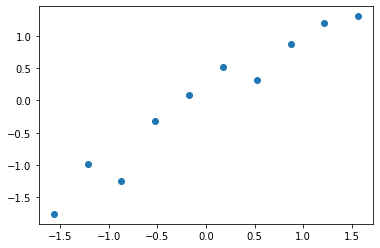

In [9]:
plt.scatter(x, y)

<h1>simple linear regression function:</h1>
y = b0 + b1 * x


In [10]:
# find final results by numerical calculus
# number initialization
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [11]:
import tensorflow as tf

In [12]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [13]:
# get the loss considering the randomic initialized vars (b0, b1), 
erro = tf.losses.mean_squared_error(y, (b0 + b1 * x))
# learn optmization rate
otimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
# training process, using the optimizer 
training = otimizer.minimize(erro)
init = tf.global_variables_initializer()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [14]:
with tf.Session() as sess:
    sess.run(init)
    # run the train 1000 times
    for i in range(1000):
        sess.run(training)
    b0_final, b1_final = sess.run([b0,b1])

In [15]:
b0_final

0.07293496

In [16]:
b1_final

0.9359134

In [17]:
predictions = b0_final + b1_final * x

In [18]:
predictions

array([[-1.39335951],
       [-1.06751629],
       [-0.74167308],
       [-0.41582986],
       [-0.08998665],
       [ 0.23585657],
       [ 0.56169979],
       [ 0.887543  ],
       [ 1.21338622],
       [ 1.53922944]])

In [19]:
type(predictions)

numpy.ndarray

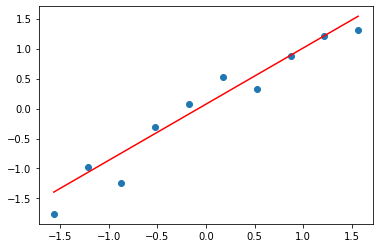

In [20]:
# plot original values and predicts
plt.plot(x, y, 'o')
plt.plot(x, predictions, color='red')

In [24]:
# put test age on same scale as x
test_age = scaler_x.transform([[40]])

In [28]:
# get prediction for test age(on same scale as y)
predict1 = scaler_y.inverse_transform(b0_final + b1_final * test_age)
predict1

array([[1475.15949902]])

<h1>Calculating Errors:</h1>

In [31]:
y1 = scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [33]:
predicts1 = scaler_y.inverse_transform(predictions)
predicts1

array([[ 993.37306876],
       [1102.86998473],
       [1212.3669007 ],
       [1321.86381666],
       [1431.36073263],
       [1540.8576486 ],
       [1650.35456456],
       [1759.85148053],
       [1869.3483965 ],
       [1978.84531246]])

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, predicts1)
mse = mean_squared_error(y1, predicts1)

In [35]:
mae

67.9187540892004

In [36]:
mse

7153.912871448908